<a href="https://colab.research.google.com/github/yubisushi/-/blob/main/10%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1: MSE=2.5266, MAPE=219.46%
Epoch 10: MSE=2.5035, MAPE=223.08%
Epoch 20: MSE=2.4778, MAPE=227.19%
Epoch 30: MSE=2.4521, MAPE=231.36%
Epoch 40: MSE=2.4264, MAPE=235.58%
Epoch 50: MSE=2.4008, MAPE=239.83%


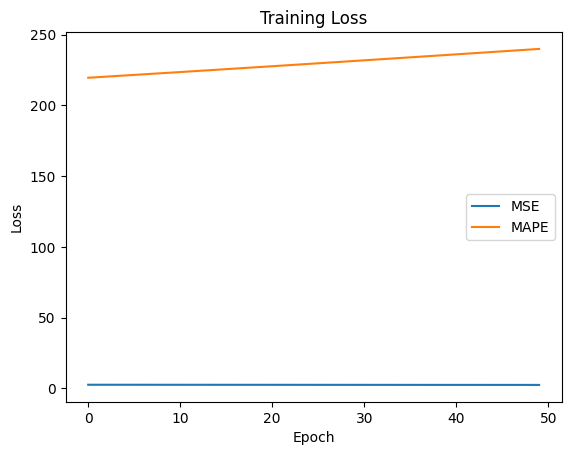

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100


np.random.seed(0)
samples = 1000
x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)
X = np.column_stack((x1, x2))
y = 2 * x1 + 3 * x2 - 1
y = y.reshape(-1, 1)


input_dim = 2
hidden_dim = 3
output_dim = 1
lr = 0.01
epochs = 50


W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))


mse_list, mape_list = [], []

for epoch in range(epochs):

    Z1 = X @ W1 + b1
    A1 = sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    y_hat = sigmoid(Z2)


    loss_mse = mse(y, y_hat)
    loss_mape = mape(y, y_hat)
    mse_list.append(loss_mse)
    mape_list.append(loss_mape)


    dZ2 = (y_hat - y) * sigmoid_deriv(Z2)
    dW2 = A1.T @ dZ2 / samples
    db2 = np.sum(dZ2, axis=0, keepdims=True) / samples

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * sigmoid_deriv(Z1)
    dW1 = X.T @ dZ1 / samples
    db1 = np.sum(dZ1, axis=0, keepdims=True) / samples


    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1


    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}: MSE={loss_mse:.4f}, MAPE={loss_mape:.2f}%")


plt.plot(mse_list, label='MSE')
plt.plot(mape_list, label='MAPE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()
